170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 133s 1us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 310ms/step - accuracy: 0.5222 - loss: 1.3814 - val_accuracy: 0.6157 - val_loss: 1.1190
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 296s 377ms/step - accuracy: 0.6564 - loss: 0.9799 - val_accuracy: 0.6306 - val_loss: 1.0860
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 357ms/step - accuracy: 0.7070 - loss: 0.8357 - val_accuracy: 0.6315 - val_loss: 1.0739
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 247s 316ms/step - accuracy: 0.7547 - loss: 0.7077 - val_accuracy: 0.6280 - val_loss: 1.1175
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 330ms/step - accuracy: 0.8071 - loss: 0.5631 - val_accuracy: 0.6256 - val_loss: 1.1859
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 297s 380ms/step - accuracy: 0.8561 - loss: 0.4368 - val_accuracy: 0.6218 - val_loss: 1.2934
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 313s 400ms/step - accuracy: 0.8936 - loss: 0.3382 - val_accur

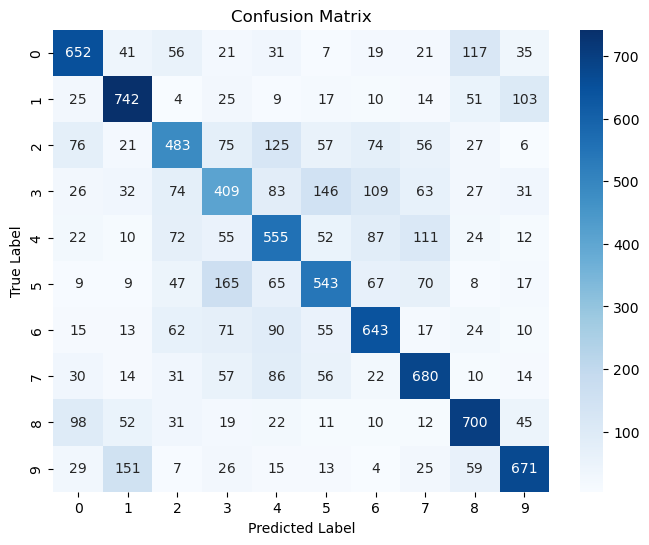

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      1000
           1       0.68      0.74      0.71      1000
           2       0.56      0.48      0.52      1000
           3       0.44      0.41      0.43      1000
           4       0.51      0.56      0.53      1000
           5       0.57      0.54      0.55      1000
           6       0.62      0.64      0.63      1000
           7       0.64      0.68      0.66      1000
           8       0.67      0.70      0.68      1000
           9       0.71      0.67      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

cr = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", cr)